# 🤖 Detección de Suicidio y Depresión con Múltiples Modelos de ML 🧠
Este notebook implementa varios modelos de machine learning para detectar señales de suicidio y depresión en textos.
## 📋 Contenido:
1. 📚 Importación de librerías
2. 🔍 Carga y exploración de datos
3. 🧹 Preprocesamiento de texto
4. 🎯 Entrenamiento de modelos
5. 📈 Evaluación y comparación
6. 💾 Guardado de modelos

¡Empecemos! 🚀
## 1. 📚 Importación de Librerías

In [3]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [3]:
# Librerías básicas 📊
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de texto 📝
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Modelos de Machine Learning 🤖
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Utilidades 🛠️
import joblib

# Configuración de visualización 🎨
plt.style.use('default')  # Cambiamos 'seaborn' por 'default'
sns.set_theme()  # Esto configura el estilo de seaborn de manera correcta

## 2. 🔍 Carga y Exploración de Datos

Descargando recursos de NLTK... 📥


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cdori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cdori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cdori\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Cargando datos... 📂

📊 Dimensiones del dataset: (232074, 3)

📈 Distribución de clases:
class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


c:\Users\cdori\Music\proyecto\hackaton\SIC25-FAVFIX\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


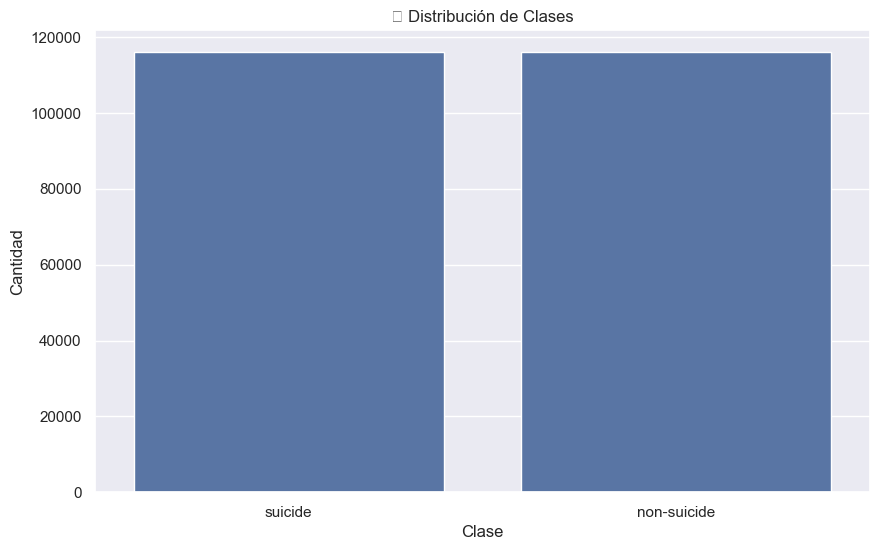

In [4]:
# Descarga de recursos NLTK 📥
print("Descargando recursos de NLTK... 📥")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Carga de datos 📊
print("\nCargando datos... 📂")
df = pd.read_csv('Suicide_Detection.csv')

# Información del dataset
print("\n📊 Dimensiones del dataset:", df.shape)
print("\n📈 Distribución de clases:")
print(df['class'].value_counts())

# Visualización de la distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('📊 Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

## 3. 🧹 Preprocesamiento de Texto

In [ ]:
# Configuración del preprocesamiento 🛠️
stop_words_english = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Minúsculas 📝
    text = text.lower()
    # 2. Eliminar puntuación ✂️
    text = ''.join([char for char in text if char not in string.punctuation])
    # 3. Tokenización 🔍
    tokens = text.split()
    # 4. Eliminar Stop Words 🚫
    tokens = [word for word in tokens if word not in stop_words_english]
    # 5. Lematización 🔄
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Aplicar preprocesamiento
print("Aplicando preprocesamiento de texto... 🧹")
df['texto_preprocesado'] = df['text'].apply(preprocess_text)

# Vectorización TF-IDF
print("Realizando vectorización TF-IDF... 🔢")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['texto_preprocesado'])
y = (df['class'] == 'suicide').astype(int)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Aplicando preprocesamiento de texto... 🧹


## 4. 🎯 Entrenamiento de Modelos

In [ ]:
# Definición de modelos 🤖
modelos = {
    'Regresión Logística 📊': LogisticRegression(max_iter=1000),
    'Naive Bayes 🔄': MultinomialNB(),
    'SVM Lineal 🎯': SVC(kernel='linear', probability=True),
    'XGBoost 🌳': xgb.XGBClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'Random Forest 🌲': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
}

# Entrenamiento y evaluación 📈
resultados = {}
for nombre_modelo, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre_modelo} 🚀")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    reporte = classification_report(y_test, y_pred)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    
    resultados[nombre_modelo] = {
        'accuracy': accuracy,
        'reporte': reporte,
        'matriz_confusion': matriz_confusion,
        'modelo': modelo
    }
    
    # Visualización de matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre_modelo} 📊')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

## 5. 📈 Evaluación y Comparación

In [ ]:
# Comparación de todos los modelos
print("\n🏆 === Comparación de Modelos ===")
print("📊 Accuracy Scores:")
for nombre_modelo, res in resultados.items():
    print(f"{nombre_modelo}: {res['accuracy']:.4f}")
    print("\nReporte de clasificación:")
    print(res['reporte'])

# Curvas ROC
plt.figure(figsize=(10, 8))
for nombre_modelo, res in resultados.items():
    y_pred_proba = res['modelo'].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('📊 Curvas ROC para todos los modelos')
plt.legend()
plt.show()

## 6. 💾 Guardado de Modelos

In [ ]:
print("Guardando los modelos... 💾")
for nombre_modelo, res in resultados.items():
    joblib.dump(res['modelo'], f'modelo_{nombre_modelo.lower().replace(" ", "_")}.joblib')
    print(f"✅ Modelo {nombre_modelo} guardado")

# Guardar el vectorizador
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizador.joblib')
print("✅ Vectorizador TF-IDF guardado")

print("\n🎉 ¡Proceso completado con éxito! 🎉")